Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A1      678 non-null    category
 1   A2      678 non-null    float64 
 2   A3      690 non-null    float64 
 3   A4      684 non-null    category
 4   A5      684 non-null    category
 5   A6      681 non-null    category
 6   A7      681 non-null    category
 7   A8      690 non-null    float64 
 8   A9      690 non-null    category
 9   A10     690 non-null    category
 10  A11     690 non-null    int64   
 11  A12     690 non-null    category
 12  A13     690 non-null    category
 13  A14     677 non-null    float64 
 14  A15     690 non-null    int64   
dtypes: category(9), float64(4), int64(2)
memory usage: 40.4 KB
None

Primeiras linhas dos dados:
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f  

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


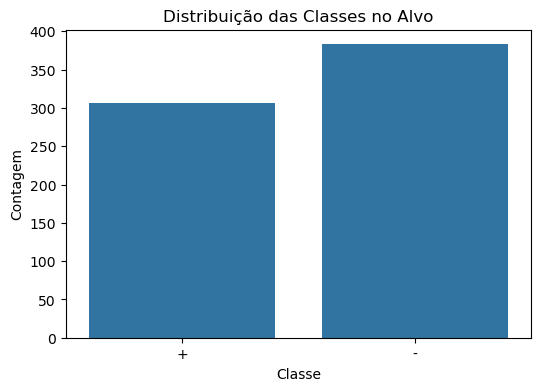

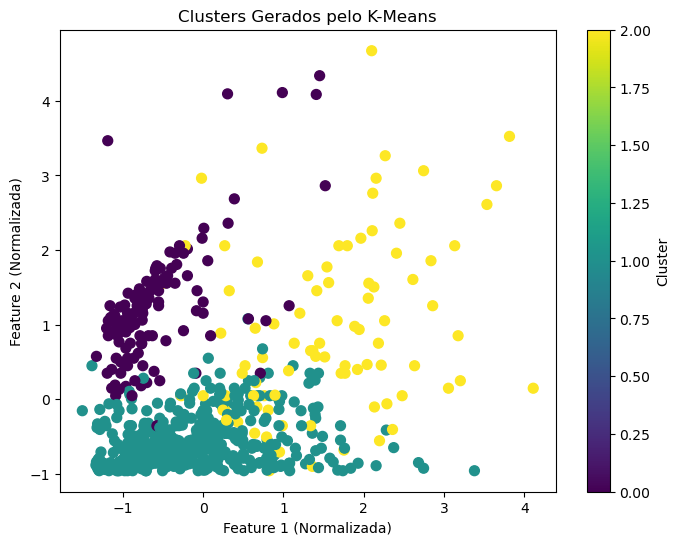

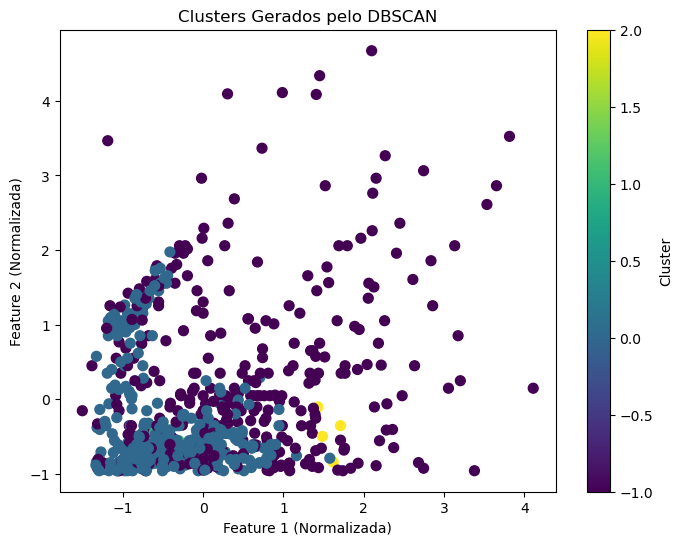

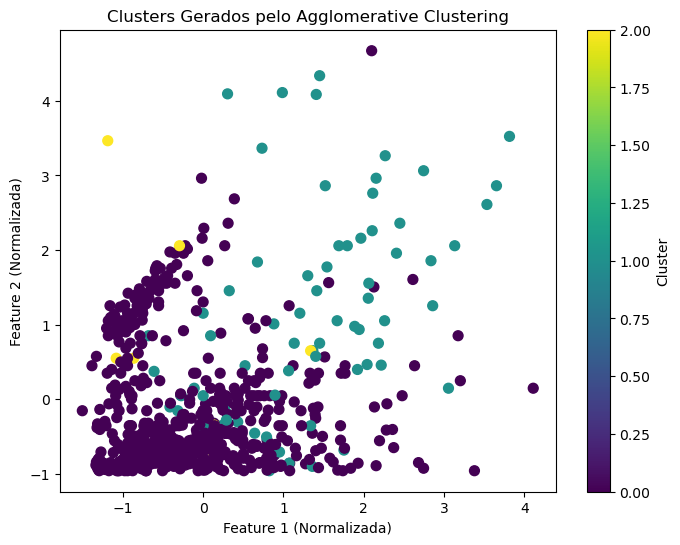

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Melhores Hiperparâmetros para K-Means:
Número de Clusters: 2
Silhouette Score: 0.43263580554347536

Melhores Hiperparâmetros para DBSCAN:
eps: 1.0
min_samples: 10
Silhouette Score: 0.38112119175394826


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


# Carregar a base de dados Credit Approval
credit_approval = fetch_openml(name='credit-approval', version=1, as_frame=True)

# Dados (como dataframes pandas)
X = credit_approval.data
y = credit_approval.target

# Exibir informações básicas sobre os dados
print("Informações sobre os dados:")
print(X.info())
print("\nPrimeiras linhas dos dados:")
print(X.head())

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(X.isnull().sum())

# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas:")
print(X.describe())

# Distribuição das classes no alvo
print("\nDistribuição das classes no alvo:")
print(y.value_counts())

# Verificar a correlação entre as colunas numéricas
print("\nCorrelação entre as colunas numéricas:")
print(X.select_dtypes(include=[np.number]).corr())

# Pré-processamento dos dados
# Substituir valores ausentes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X.select_dtypes(include=[np.number]))

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Função para visualizar os dados e os clusters
def visualizar_dados(X_scaled, y, kmeans_labels, dbscan_labels, agglo_labels):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y)
    plt.title("Distribuição das Classes no Alvo")
    plt.xlabel("Classe")
    plt.ylabel("Contagem")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
    plt.title("Clusters Gerados pelo K-Means")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
    plt.title("Clusters Gerados pelo DBSCAN")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', s=50)
    plt.title("Clusters Gerados pelo Agglomerative Clustering")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.show()

# Funções para aplicar os algoritmos
def aplicar_kmeans(X_scaled, n_clusters=3, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    return labels, score

def aplicar_dbscan(X_scaled, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1
    return labels, score

def aplicar_agglomerative(X_scaled, n_clusters=3):
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglo.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    return labels, score

# Exploração de hiperparâmetros para K-Means
def explorar_kmeans(X_scaled, cluster_range):
    melhor_score = -1
    melhor_k = None
    melhor_labels = None
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        if score > melhor_score:
            melhor_score = score
            melhor_k = k
            melhor_labels = labels
    return melhor_k, melhor_score, melhor_labels

# Exploração de hiperparâmetros para DBSCAN
def explorar_dbscan(X_scaled, eps_range, min_samples_range):
    melhor_score = -1
    melhor_eps = None
    melhor_min_samples = None
    melhor_labels = None
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)
            if len(set(labels)) > 1:
                score = silhouette_score(X_scaled, labels)
                if score > melhor_score:
                    melhor_score = score
                    melhor_eps = eps
                    melhor_min_samples = min_samples
                    melhor_labels = labels
    return melhor_eps, melhor_min_samples, melhor_score, melhor_labels

# Chamar as funções para aplicar os algoritmos
kmeans_labels, kmeans_score = aplicar_kmeans(X_scaled)
dbscan_labels, dbscan_score = aplicar_dbscan(X_scaled)
agglo_labels, agglo_score = aplicar_agglomerative(X_scaled)

# Comparar os resultados
print("\nSilhouette Scores:")
print(f"K-Means: {kmeans_score}")
print(f"DBSCAN: {dbscan_score}")
print(f"Hierárquico Aglomerativo: {agglo_score}")

# Visualizar os dados e clusters
visualizar_dados(X_scaled, y, kmeans_labels, dbscan_labels, agglo_labels)

# Explorar os hiperparâmetros
cluster_range = range(2, 10)
eps_range = [0.3, 0.5, 0.7, 1.0]
min_samples_range = [3, 5, 10]

melhor_k, melhor_kmeans_score, melhor_kmeans_labels = explorar_kmeans(X_scaled, cluster_range)
melhor_eps, melhor_min_samples, melhor_dbscan_score, melhor_dbscan_labels = explorar_dbscan(X_scaled, eps_range, min_samples_range)

# Exibir os melhores resultados
print("Melhores Hiperparâmetros para K-Means:")
print(f"Número de Clusters: {melhor_k}")
print(f"Silhouette Score: {melhor_kmeans_score}")

print("\nMelhores Hiperparâmetros para DBSCAN:")
print(f"eps: {melhor_eps}")
print(f"min_samples: {melhor_min_samples}")
print(f"Silhouette Score: {melhor_dbscan_score}")

O escopo do problema consiste em analisar e agrupar os dados da base de dados "Credit Approval" utilizando técnicas de aprendizado de máquina não supervisionado, como K-Means, DBSCAN e Agglomerative Clustering. O objetivo é identificar padrões ou agrupamentos nos dados que possam ser úteis para entender melhor as características dos clientes e suas classificações.

### Etapas principais:
1. **Carregamento e exploração dos dados**:
    - Carregar a base de dados "Credit Approval".
    - Explorar as características dos dados, como tipos de variáveis, valores ausentes e estatísticas descritivas.

2. **Pré-processamento dos dados**:
    - Tratar valores ausentes utilizando técnicas como imputação.
    - Normalizar os dados para garantir que todas as variáveis estejam na mesma escala.

3. **Aplicação de algoritmos de agrupamento**:
    - Aplicar os algoritmos K-Means, DBSCAN e Agglomerative Clustering para agrupar os dados.
    - Avaliar os resultados utilizando métricas como o Silhouette Score.

4. **Exploração de hiperparâmetros**:
    - Ajustar os hiperparâmetros dos algoritmos (como número de clusters, `eps` e `min_samples`) para melhorar os resultados.

5. **Visualização dos resultados**:
    - Visualizar os agrupamentos gerados pelos algoritmos para interpretar os padrões encontrados.

6. **Comparação dos algoritmos**:
    - Comparar os resultados dos diferentes algoritmos para identificar qual deles é mais adequado para os dados em questão.

O foco está em entender como os dados podem ser agrupados e quais insights podem ser extraídos a partir dos clusters gerados.